# Task 2 - User Engagement Analysis

This notebook analyzes user engagement patterns in the telecom dataset using various metrics and clustering techniques.

In [7]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scripts.data_processing_utils import *
from scripts.analysis_utils import *
from scripts.visualization_utils import *

## Load and Preprocess Data

In [8]:
# Load the data
df = load_and_preprocess_data()

# Aggregate metrics per user
user_metrics = aggregate_user_metrics(df)

print("Data Overview:")
print(f"Number of users: {len(user_metrics)}")
print("\nSample of user metrics:")
print(user_metrics.head())

Data Overview:
Number of users: 106857

Sample of user metrics:
              total_sessions  total_duration      total_dl    total_ul  \
user_id                                                                  
3.360100e+10               1        116720.0  8.426375e+08  36053108.0   
3.360100e+10               1        181230.0  1.207552e+08  36104459.0   
3.360100e+10               1        134969.0  5.566597e+08  39306820.0   
3.360101e+10               1         49878.0  4.019932e+08  20327526.0   
3.360101e+10               2         37104.0  1.363130e+09  94280527.0   

              total_volume  social_media_total  google_total  email_total  \
user_id                                                                     
3.360100e+10  8.786906e+08           2232135.0     4389005.0    1331362.0   
3.360100e+10  1.568596e+08           2660565.0     5334863.0    3307781.0   
3.360100e+10  5.959665e+08           3195623.0     3443126.0    3205380.0   
3.360101e+10  4.223207e+08      

## Task 2.1 - User Engagement Analysis

In [9]:
# Get top 10 customers per engagement metric
metrics = ['total_sessions', 'total_duration', 'total_volume']

for metric in metrics:
    print(f"\nTop 10 Users by {metric}:")
    print(user_metrics.nlargest(10, metric)[[metric]])


Top 10 Users by total_sessions:
              total_sessions
user_id                     
4.188282e+10            1066
3.362632e+10              18
3.361489e+10              17
3.362578e+10              17
3.365973e+10              16
3.367588e+10              15
3.376054e+10              15
3.366716e+10              13
3.360313e+10              12
3.360452e+10              12

Top 10 Users by total_duration:
              total_duration
user_id                     
4.188282e+10    7.255100e+07
3.362578e+10    1.855375e+07
3.361489e+10    9.966898e+06
3.376054e+10    9.279434e+06
3.362632e+10    8.791927e+06
3.366716e+10    8.744914e+06
3.366284e+10    6.614270e+06
3.366469e+10    6.288730e+06
3.360313e+10    6.287761e+06
3.366746e+10    5.649882e+06

Top 10 Users by total_volume:
              total_volume
user_id                   
4.188282e+10  5.317447e+11
3.361489e+10  8.846226e+09
3.376054e+10  8.514774e+09
3.362578e+10  8.499621e+09
3.362632e+10  7.971167e+09
3.367588e+10  7.89

### K-means Clustering (k=3)

Cluster Statistics:
        total_sessions                        total_duration               \
                   min   max     mean     sum            min          max   
cluster                                                                     
0                    1     7     1.36  144083        7142.00    783576.00   
1                 1066  1066  1066.00    1066    72551004.56  72551004.56   
2                    1    18     4.57    4852      567786.00  18553754.00   

                                    total_volume                              \
                mean           sum           min           max          mean   
cluster                                                                        
0          134751.95  1.425595e+10  3.324901e+07  4.478299e+09  6.750952e+08   
1        72551004.56  7.255100e+07  5.317447e+11  5.317447e+11  5.317447e+11   
2         1283324.23  1.362890e+09  9.705338e+07  8.846226e+09  2.271590e+09   

                       
            

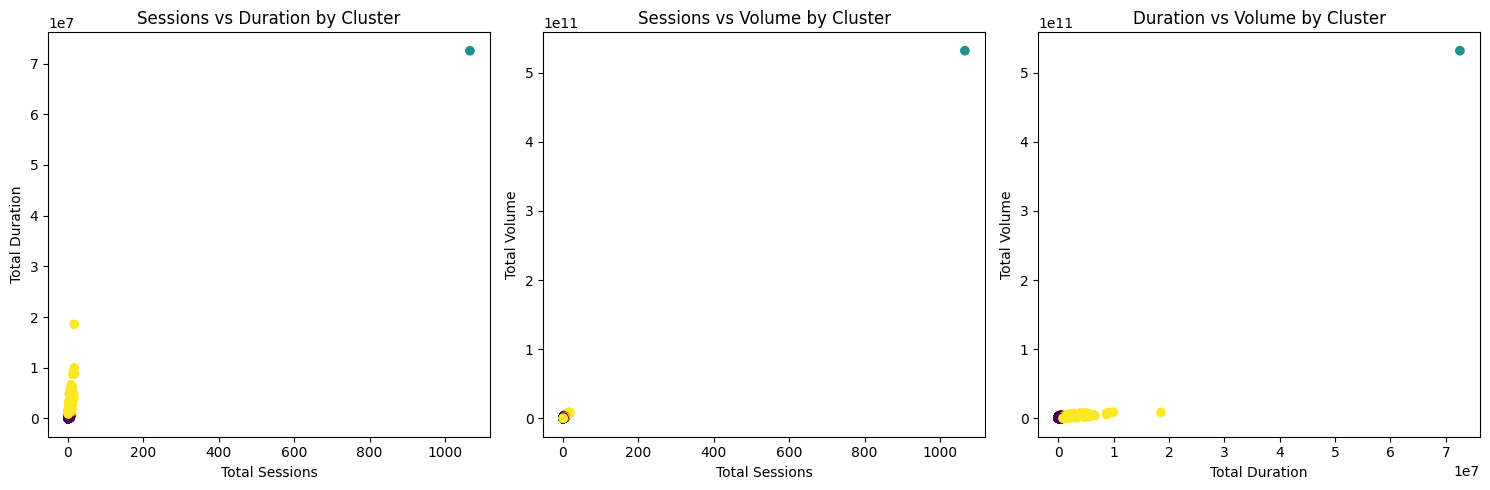

In [10]:
# Prepare data for clustering
cluster_features = ['total_sessions', 'total_duration', 'total_volume']
X = user_metrics[cluster_features].copy()

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=cluster_features, index=X.index)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
user_metrics['cluster'] = kmeans.fit_predict(X_scaled)

# Compute cluster statistics
cluster_stats = user_metrics.groupby('cluster').agg({
    'total_sessions': ['min', 'max', 'mean', 'sum'],
    'total_duration': ['min', 'max', 'mean', 'sum'],
    'total_volume': ['min', 'max', 'mean', 'sum']
}).round(2)

print("Cluster Statistics:")
print(cluster_stats)

# Visualize clusters
plt.figure(figsize=(15, 5))

# Plot 1: Sessions vs Duration
plt.subplot(131)
plt.scatter(user_metrics['total_sessions'], user_metrics['total_duration'], 
           c=user_metrics['cluster'], cmap='viridis')
plt.xlabel('Total Sessions')
plt.ylabel('Total Duration')
plt.title('Sessions vs Duration by Cluster')

# Plot 2: Sessions vs Volume
plt.subplot(132)
plt.scatter(user_metrics['total_sessions'], user_metrics['total_volume'], 
           c=user_metrics['cluster'], cmap='viridis')
plt.xlabel('Total Sessions')
plt.ylabel('Total Volume')
plt.title('Sessions vs Volume by Cluster')

# Plot 3: Duration vs Volume
plt.subplot(133)
plt.scatter(user_metrics['total_duration'], user_metrics['total_volume'], 
           c=user_metrics['cluster'], cmap='viridis')
plt.xlabel('Total Duration')
plt.ylabel('Total Volume')
plt.title('Duration vs Volume by Cluster')

plt.tight_layout()
plt.show()

### Application-wise Engagement Analysis


Top 10 Users by social_media_total:
              social_media_total
user_id                         
4.188282e+10        1.973817e+09
3.362632e+10        4.337478e+07
3.376054e+10        3.978319e+07
3.365973e+10        3.541236e+07
3.361489e+10        2.829454e+07
3.362578e+10        2.713550e+07
3.366716e+10        2.424785e+07
3.378632e+10        2.397492e+07
3.366907e+10        2.380083e+07
3.360313e+10        2.307782e+07

Top 10 Users by google_total:
              google_total
user_id                   
4.188282e+10  8.248577e+09
3.362632e+10  1.521919e+08
3.362578e+10  1.423079e+08
3.361489e+10  1.279738e+08
3.376054e+10  1.232231e+08
3.365973e+10  1.165163e+08
3.378632e+10  1.102545e+08
3.367588e+10  1.098605e+08
3.366716e+10  1.050327e+08
3.376127e+10  9.708999e+07

Top 10 Users by email_total:
               email_total
user_id                   
4.188282e+10  2.399880e+09
3.362632e+10  4.241878e+07
3.361489e+10  4.078863e+07
3.362578e+10  4.063397e+07
3.378632e+10  3.6310

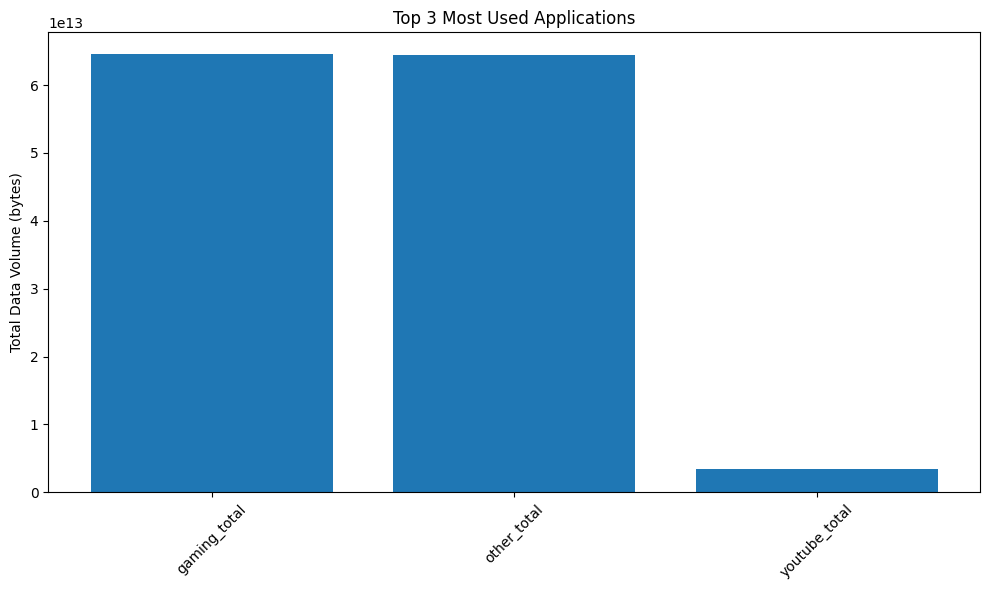

In [11]:
# Get application columns
app_columns = ['social_media_total', 'google_total', 'email_total', 'youtube_total',
               'netflix_total', 'gaming_total', 'other_total']

# Get top 10 users per application
for app in app_columns:
    print(f"\nTop 10 Users by {app}:")
    print(user_metrics.nlargest(10, app)[[app]])

# Plot top 3 most used applications
app_usage = user_metrics[app_columns].sum().sort_values(ascending=False)
top_3_apps = app_usage.head(3)

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_3_apps)), top_3_apps.values)
plt.xticks(range(len(top_3_apps)), top_3_apps.index, rotation=45)
plt.title('Top 3 Most Used Applications')
plt.ylabel('Total Data Volume (bytes)')
plt.tight_layout()
plt.show()

### Optimal K Selection using Elbow Method

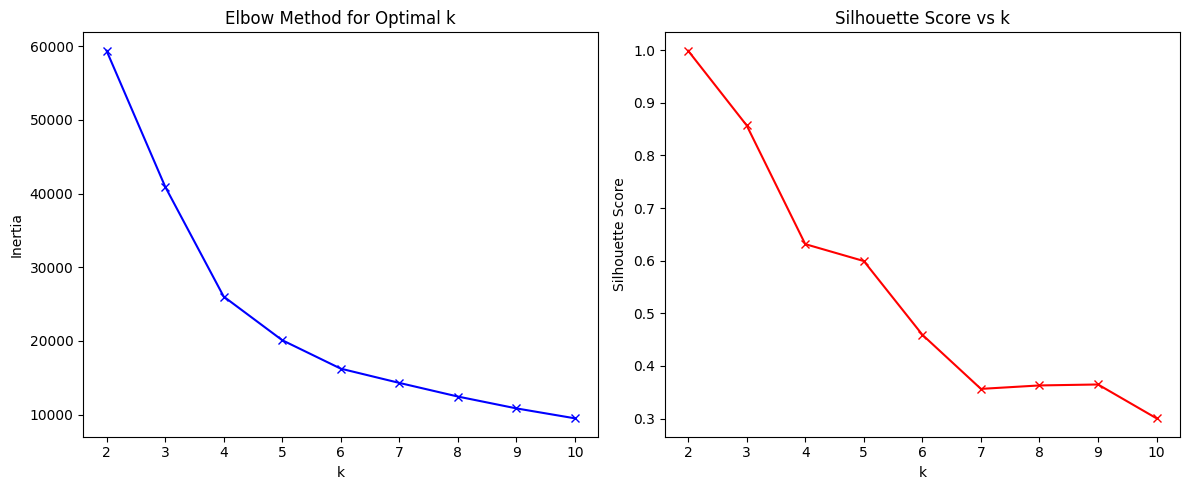


Optimal number of clusters (k) based on silhouette score: 2


In [12]:
# Calculate inertia for different k values
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot elbow curve
plt.figure(figsize=(12, 5))

# Plot 1: Elbow curve
plt.subplot(121)
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Plot 2: Silhouette scores
plt.subplot(122)
plt.plot(k_range, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')

plt.tight_layout()
plt.show()

# Find optimal k
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters (k) based on silhouette score: {optimal_k}")